In [3]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
print(df['v2'].apply(lambda x: len(x.split(' '))).sum())

86961


Cleaning data

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Renaming the columns

In [10]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
spam = df[df["label"] == "spam"]
spam.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [12]:
ham = df[df["label"] == "ham"]
ham.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


Basic Exploratory Data Analysis(EDA)

In [13]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

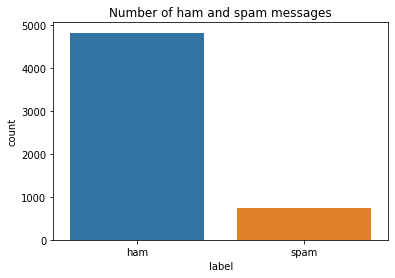

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label',data=df)
plt.xlabel('label')
plt.title('Number of ham and spam messages');

Length of text messages

In [15]:
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['length'] = df.message.apply(len)
df.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


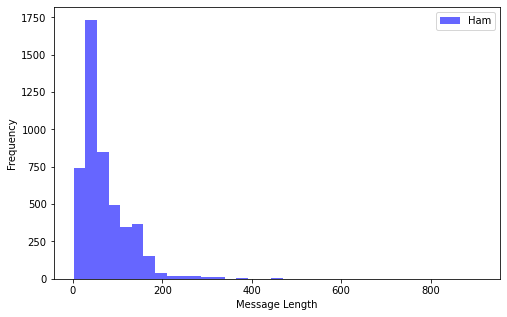

In [17]:
plt.figure(figsize=(8, 5))
df[df.label == 0].length.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");

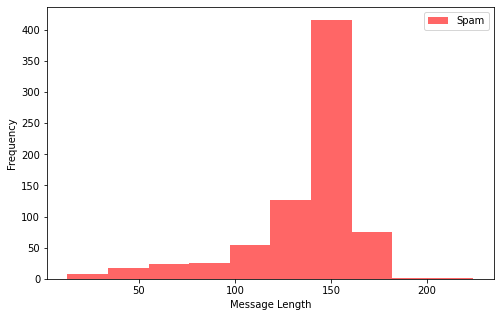

In [18]:
plt.figure(figsize=(8, 5))
df[df.label == 1].length.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");

In [19]:
df['label'] = df['label'].map({0:'ham', 1:'spam'})

In [20]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.2, random_state = 1)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Training

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = GaussianNB()
clf.fit(X_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_true, y_pred = y_test, clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9085201793721973

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.91      0.95       976
        spam       0.58      0.92      0.72       139

    accuracy                           0.91      1115
   macro avg       0.79      0.91      0.83      1115
weighted avg       0.94      0.91      0.92      1115



In [26]:
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), 
    index=['ham', 'spam'], 
    columns=['ham', 'spam']
)
print(cmtx)

      ham  spam
ham   885    91
spam   11   128


Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {"var_smoothing":[1e-9, 1e-5, 1e-1]}
gs_clf = GridSearchCV(
        GaussianNB(), parameters)
gs_clf.fit(X_train.toarray(),y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
gs_clf.best_params_

{'var_smoothing': 0.1}

In [29]:
y_true, y_pred = y_test, gs_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9659192825112107

In [30]:
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), 
    index=['ham', 'spam'], 
    columns=['ham', 'spam']
)
print(cmtx)

      ham  spam
ham   942    34
spam    4   135


In [31]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       976
        spam       0.80      0.97      0.88       139

    accuracy                           0.97      1115
   macro avg       0.90      0.97      0.93      1115
weighted avg       0.97      0.97      0.97      1115





```
# This is formatted as code
```

## Inference

In [32]:
user_input = []
input_msg = input('Enter a message : ')
user_input.append(input_msg)
message = vectorizer.transform(user_input)
message = message.toarray()
gs_clf.predict(message)

Enter a message : hello how are you


array(['ham'], dtype='<U4')

In [33]:
message = vectorizer.transform(["this offer is to good to be true"])
message = message.toarray()
gs_clf.predict(message)

array(['spam'], dtype='<U4')